# Level 4 Python
--------------|-------|
|Danylo Zdoryk| 233305|
|Dmytro Shelest| 226453|
|Gracjan Grala| 210192|
|Jan Kisielewicz| 210221|



---
## Importing libraries

In [424]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

---
## Reading data and creating data frame using pandas

In [425]:
df = pd.read_csv("D:\Projects\data-processing-with-python\\athlete_events.csv")
# Showing columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


---
# Exercises
---


---
## Exercise 1. Prepare a summary of the total number of competitors at the Summer and Winter Olympics in the following years.
---

In [426]:
participants_1 = df[['Year', 'Season' , 'ID']].groupby(['Year', 'Season']).count().reset_index().rename(columns={"ID":"Amount"})
participants_1

,Year,Season,Amount
0,1896,Summer,380
1,1900,Summer,1936
2,1904,Summer,1301
3,1906,Summer,1733
4,1908,Summer,3101
5,1912,Summer,4040
6,1920,Summer,4292
7,1924,Summer,5233
8,1924,Winter,460
9,1928,Summer,4992


---
## Visualization 1.1
---

C:\Users\nicez\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


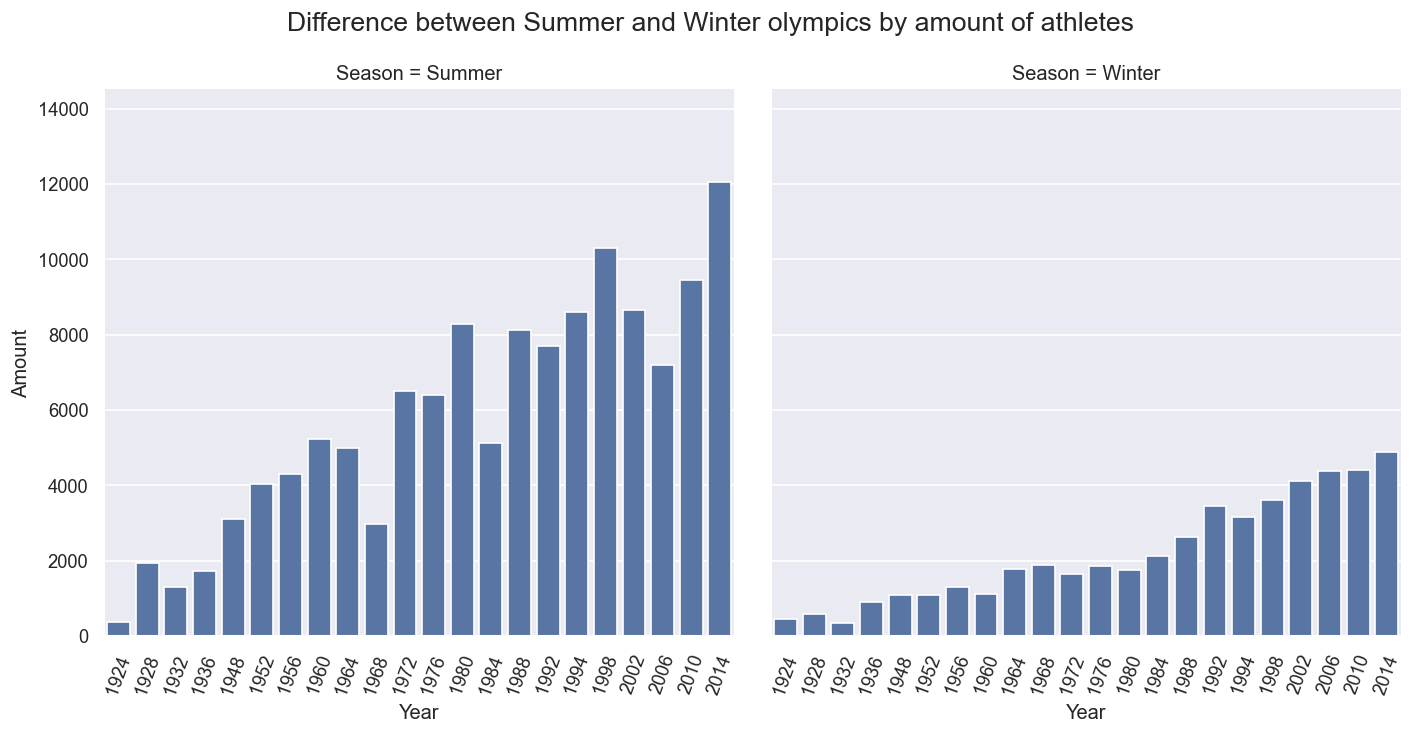

In [427]:
g = sns.FacetGrid(participants_1, col="Season")
g.fig.set_dpi(120)
g.fig.suptitle('Difference between Summer and Winter olympics by amount of athletes', fontsize=16)
g.fig.set_size_inches(12,6)
g.map(sns.barplot, "Year", "Amount")
g.set_xticklabels(rotation=70)
plt.show()

---
## Visualization 1.2
---

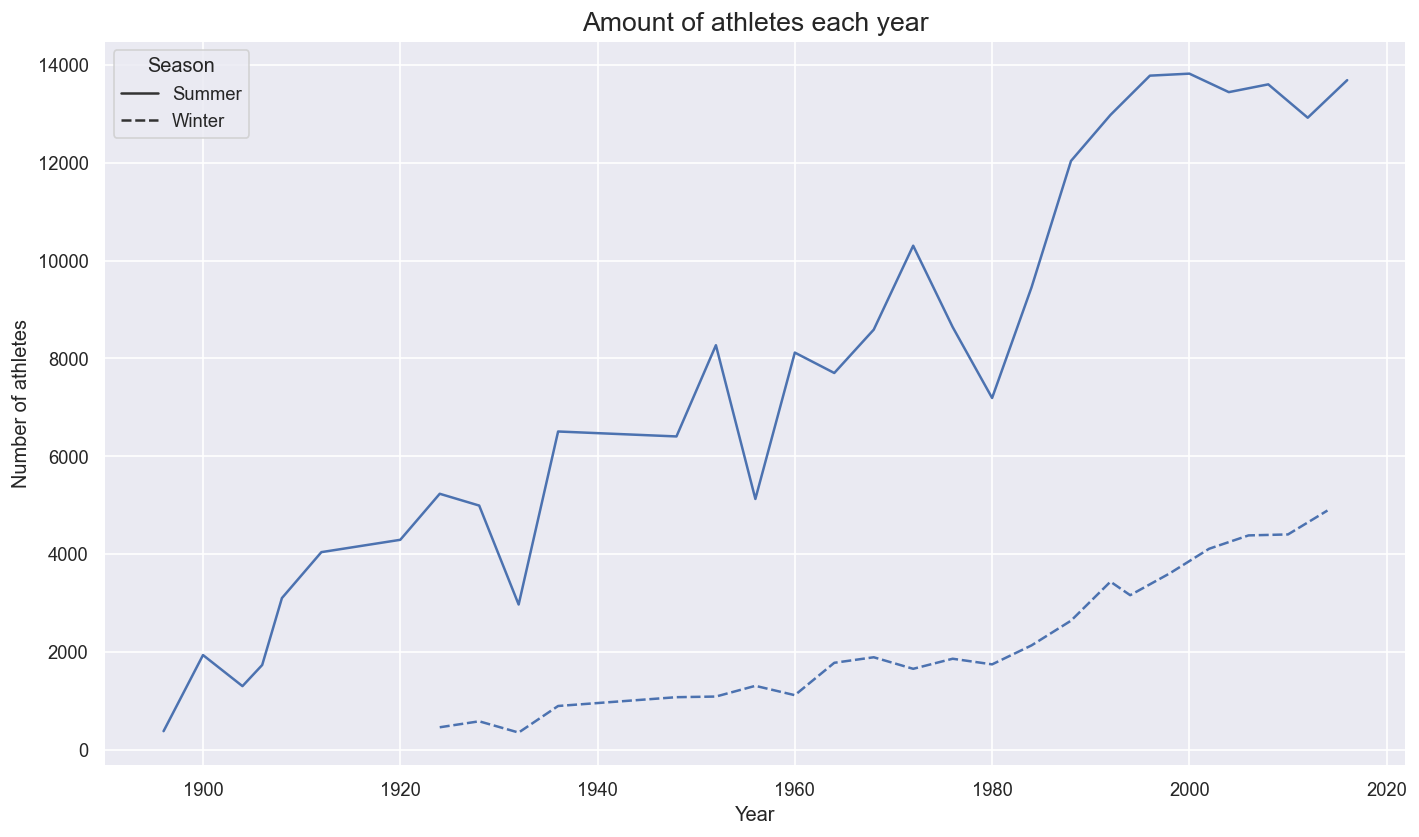

In [428]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Amount of athletes each year', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of athletes')
sns.lineplot(x=participants_1.Year, y=participants_1.Amount, style=participants_1.Season)
plt.show()

---
## Exercise 2. Prepare a table showing the average number of women and men competing in the Summer Olympics for each National Olympic Committee.
---

In [429]:
gender_amount = df[df.Season == 'Summer'].groupby(['NOC','Sex','Year']).size().reset_index().rename(columns={0:"Amount"})
pd.set_option("display.precision", 3)
result_2 = gender_amount.drop('Year', axis=1).groupby(['NOC', 'Sex']).mean().reset_index()
result_2

,NOC,Sex,Amount
0,AFG,F,1.250
1,AFG,M,8.643
2,AHO,F,2.400
3,AHO,M,4.769
4,ALB,F,3.125
...,...,...,...
447,YUG,M,109.312
448,ZAM,F,2.111
449,ZAM,M,12.615
450,ZIM,F,9.417


---
## Visualization 1
---

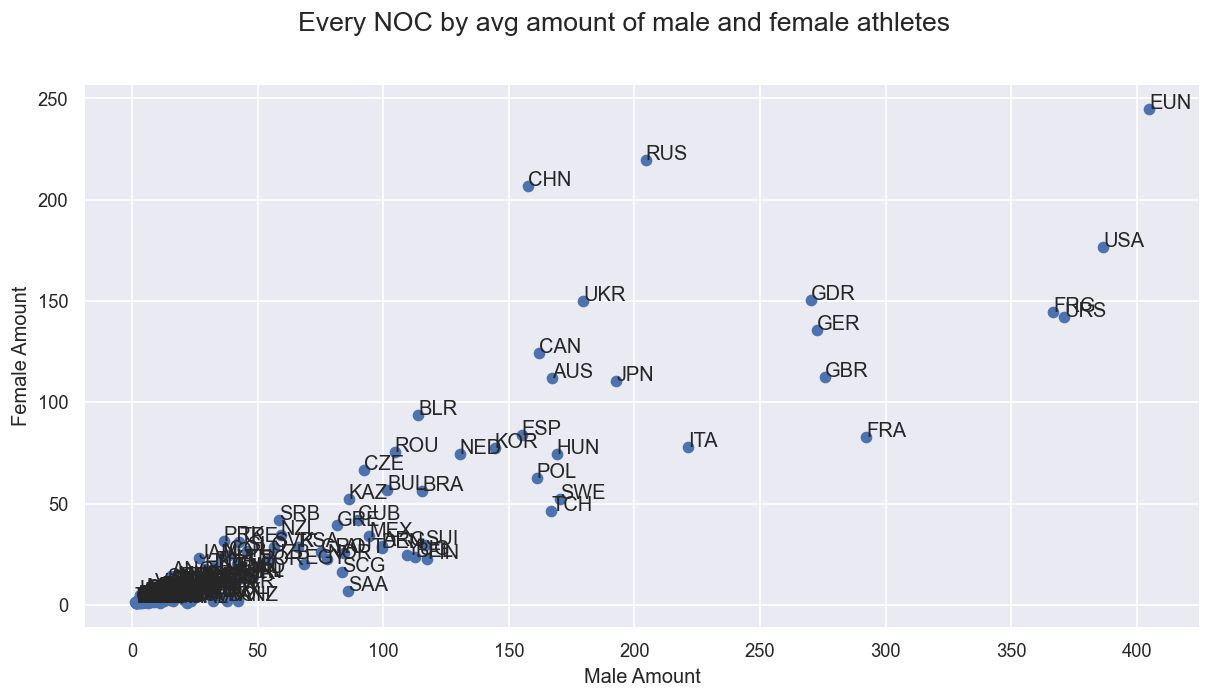

In [430]:
temp = result_2[['NOC', 'Sex']].groupby(["NOC"]).sum().reset_index()
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)]
male = temp[temp['Sex'] == 'M'].reset_index()
female = temp[temp['Sex'] == 'F'].reset_index()

fig, ax = plt.subplots()
fig.set_size_inches(12,6)
fig.set_dpi(120)
fig.suptitle('Every NOC by avg amount of male and female athletes', fontsize=16)
ax.set_xlabel('Male Amount', fontsize=12)
ax.set_ylabel('Female Amount', fontsize=12)
plt.scatter(male.Amount, female.Amount)

for i in range(len(male)):
    plt.annotate(male.loc[i, 'NOC'], (male.loc[i, 'Amount'], female.loc[i, 'Amount']))

---
## Visualization 2
---

In [491]:
temp = result_2[~result_2.NOC.isin(temp[temp['Sex'] == 'M'].NOC)].reset_index()
summary = temp.groupby(['NOC']).sum()
new_sum = pd.DataFrame(np.repeat(summary.values, 2, axis=0), columns=summary.columns)

# print(new_sum)
temp['AVG'] = temp.Amount / new_sum.Amount * 100
female = temp[temp.Sex == 'F'].reset_index()
male = temp[temp.Sex == 'M'].reset_index()
delta = np.abs(female.AVG - male.AVG)
counter = 0
for i in range(len(delta)):
    for j in range(2):
        temp.loc[counter, 'Delta'] = delta.loc[i]
        counter += 1

# Показывает 15 лучших стран по дельте
temp.sort_values(by=['Delta']).head(30)

# Можно сделать 2 графика в 1 будут 10 - 15 лучших стран во втором худших


,index,NOC,Sex,Amount,AVG,Delta
97,97,CPV,M,1.500,50.000,0.000
96,96,CPV,F,1.500,50.000,0.000
262,263,MHL,F,2.333,50.000,0.000
263,264,MHL,M,2.333,50.000,0.000
244,245,MAD,F,6.000,51.064,2.128
245,246,MAD,M,5.750,48.936,2.128
11,11,ANG,M,15.333,51.685,3.371
10,10,ANG,F,14.333,48.315,3.371
337,340,RUS,M,204.400,48.178,3.643
336,339,RUS,F,219.857,51.822,3.643


---
## 1.3 Prepare a list of the 5 National Olympic Committees that put together the largest number of different competitors and the number of their competitors depending on the number of Olympics in which the competitor participated.

In [432]:
# unique = df.drop_duplicates(subset='Name').reset_index()
# unique